In [1]:
#Q1 a part

import numpy as np

# defining function to be differentiated
def f(x):
    return np.sin(x)


##################################### Forward difference
def fd(g,x,h):
    return (g(x+h)-g(x))/h

##################################### Backward difference
def bd(g,x,h):
    return (g(x)-g(x-h))/h

##################################### Central difference
def cd(g,x,h):
    return (g(x+h)-g(x-h))/(2*h)

##################################### Five-point approximation
def fiveptapprox(g,x,h):
    return (g(x-2*h)-8*g(x-h)+8*g(x+h)-g(x+2*h))/(12*h)


###############################################################################################################
# given data
x=2*np.pi/5
hs = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001]


fd_list=[]
bd_list=[]
cd_list=[]
fiveptapprox_list=[]


print('h',end='           ')
print('forward diff',end = '    ')
print('backward diff', end ='    ')
print('central diff', end = '     ')
print('five point approx',end='         ')
print('\n')
for h in hs:
    a = fd(f,x,h)
    b = bd(f,x,h)
    c = cd(f,x,h)
    d = fiveptapprox(f,x,h)
    
    print(f"{h:.5f}",end='     ')
    
    print(f"{a:.10f}",end='   ')

    print(f"{b:.10f}",end='      ')
    
    print(f"{c:.10f}",end='    ')
    
    print(f"{d:.10f}",end='    ')
    
    print('\n')
    
    
    fd_list.append(a)
    bd_list.append(b)
    cd_list.append((c))
    fiveptapprox_list.append((d))
                             

h           forward diff    backward diff    central diff     five point approx         

0.50000     0.0634494735   0.5291530824      0.2963012779    0.3083920924    

0.20000     0.2121719422   0.4017500526      0.3069609974    0.3090005918    

0.10000     0.2609890118   0.3560154352      0.3085022235    0.3090159655    

0.05000     0.2851167935   0.3326597133      0.3088882534    0.3090169300    

0.02000     0.2994861455   0.3185066418      0.3089963937    0.3090169927    

0.01000     0.3042566012   0.3137670871      0.3090118441    0.3090169943    

0.00500     0.3066380705   0.3113933431      0.3090157068    0.3090169944    

0.00200     0.3080657322   0.3099678446      0.3090167884    0.3090169944    

0.00100     0.3085414147   0.3094924711      0.3090169429    0.3090169944    

0.00050     0.3087792174   0.3092547456      0.3090169815    0.3090169944    

0.00020     0.3089218867   0.3091120980      0.3090169923    0.3090169944    

0.00010     0.3089694410   0.3090645467  

correct value is 0.3090169944


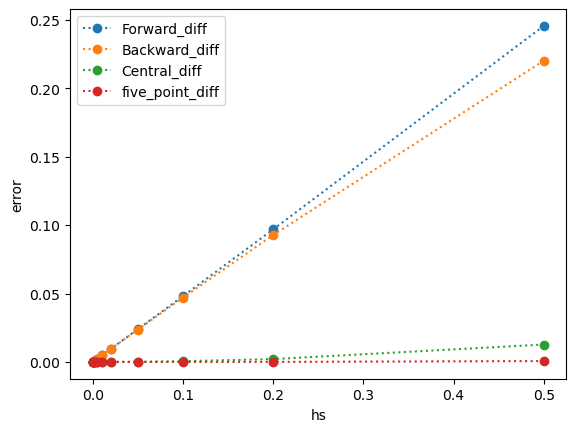

In [2]:
#Q1 b part

#calculating exact value
exact_value=np.cos(2*np.pi/5)
print("correct value is",f"{exact_value:.10f}")

#calculating error
fd_error = abs(fd_list - exact_value)
# fd_error=[abs(i-exact_value) for i in fd_list]
bd_error = [abs(i-exact_value) for i in bd_list]
cd_error = [abs(i-exact_value) for i in cd_list]
fiveptapprox_error = [abs(i-exact_value) for i in fiveptapprox_list]

#plotting
import matplotlib.pyplot as plt
plt.plot(hs,fd_error,':o',label='Forward_diff')
plt.plot(hs,bd_error,':o',label='Backward_diff')
plt.plot(hs,cd_error,':o',label='Central_diff')
plt.plot(hs,fiveptapprox_error,':o',label='five_point_diff')
plt.xlabel('hs')
plt.ylabel('error')
plt.legend()
plt.show()

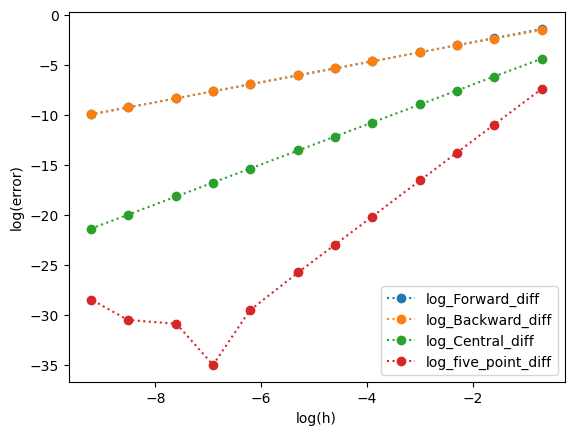

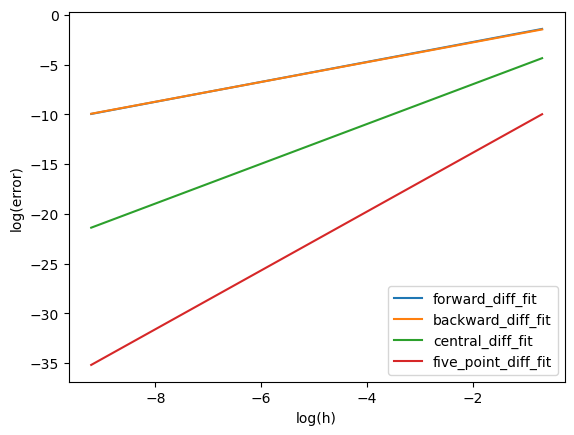

slope of linear fit of Forward diff method is  1.0028183800595138
slope of linear fit of Backward diff method is  0.9945608990283745
slope of linear fit of Central diff method is  1.999240801151543
slope of linear fit of Five pt approx method is  2.957077679433664

therefore the best method is Five pt approx method


In [3]:
#Q1 c part

log_hs=np.array(np.log(hs))
log_fd_error=np.array(np.log(fd_error))
log_bd_error=np.array(np.log(bd_error))
log_cd_error=np.array(np.log(cd_error))
log_fiveptapprox_error=np.array(np.log(fiveptapprox_error))

plt.plot(log_hs,log_fd_error,':o',label='log_Forward_diff')
plt.plot(log_hs,log_bd_error,':o',label='log_Backward_diff')
plt.plot(log_hs,log_cd_error,':o',label='log_Central_diff')
plt.plot(log_hs,log_fiveptapprox_error,':o',label='log_five_point_diff')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.legend()
plt.show()

#for curve fitting
from scipy.optimize import curve_fit

def eq_of_line(xs, p0, p1):
    return p0*xs+p1

fd_params, fd_covariance = curve_fit(eq_of_line,log_hs, log_fd_error, p0=[1.0, 1.0])
bd_params, bd_covariance = curve_fit(eq_of_line,log_hs, log_bd_error, p0=[1.0, 1.0])
cd_params, cd_covariance = curve_fit(eq_of_line,log_hs, log_cd_error, p0=[1.0, 1.0])
fiveptapprox_params, fiveptapprox_covariance = curve_fit(eq_of_line,log_hs, log_fiveptapprox_error, p0=[1.0, 1.0])

plt.plot(log_hs, eq_of_line(log_hs, fd_params[0], fd_params[1]),label='forward_diff_fit')
plt.plot(log_hs, eq_of_line(log_hs, bd_params[0], bd_params[1]),label='backward_diff_fit')
plt.plot(log_hs, eq_of_line(log_hs, cd_params[0], cd_params[1]),label='central_diff_fit')
plt.plot(log_hs, eq_of_line(log_hs, fiveptapprox_params[0], fiveptapprox_params[1]),label='five_point_diff_fit')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.legend()
plt.show()



"""
efficinecy of the method, comparing the slope, the one with highest slope has the best accuracy!
      which method is best ???
      
"""

method_name = ['Forward diff method', 'Backward diff method', 'Central diff method', 'Five pt approx method']
method_slope = [fd_params[0],bd_params[0],cd_params[0],fiveptapprox_params[0]]
                
def best_method(method_name, method_slope):
    best_slope = max(method_slope)
    for i in range(len(method_slope)):
        if best_slope == method_slope[i]:
            return method_name[i]

print('slope of linear fit of Forward diff method is ', fd_params[0])
print('slope of linear fit of Backward diff method is ', bd_params[0])
print('slope of linear fit of Central diff method is ', cd_params[0])
print('slope of linear fit of Five pt approx method is ', fiveptapprox_params[0])
print('\n'+'therefore the best method is',best_method(method_name, method_slope))

In [4]:
#Q2
import numpy as np

# defining function to be integrated
def f(x):    
    return np.exp(x)

################################################################################################################################################
#                     defining different methods for integration
#############################################################################################################


def Trapz(a,b,N,f):                   ### N is total no. of points
    h = (b-a)/(N - 1)               #step size
    result = 0
    xval = np.arange(a,b-2*h + h/10,2*h)   ## np.arange left the last term, so adding small buffer(i.e., h/10) to take this last term aslo.
    for i in xval:
        x1 = i
        x2 = x1+h
        x3 = x2+h
        integral = (h/2)*(f(x1)+2*(f(x2))+f(x3))
        result += integral
    return result

def Simpson_13(a,b,N,f):
    if (N-1) % 2 !=0:
        N += 1
    h = (b-a)/(N - 1)           
    result = 0
    xval = np.arange(a,b-2*h + h/10,2*h)
    for i in xval:
        x1 = i
        x2 = x1+h
        x3 = x2+h
        integral = (h/3)*(f(x1)+4*(f(x2))+f(x3))
        result += integral
    return result
        
def Simpson_38(a,b,N,f):
    if (N-1)%3 !=0:
        N +=1
    h = (b-a)/(N - 1)           
    result = 0
    xval = np.arange(a,b-3*h + h/10,3*h)
    for i in xval:
        x1 = i
        x2 = x1+h
        x3 = x2+h
        x4 = x3+h
        integral = (3*(h/8))*(f(x1)+3*(f(x2))+3*f(x3)+f(x4))
        result += integral
    return result
    
    

def bodes(a,b,N,f):
    if (N-1)%4 !=0:
        N +=1
    h = (b-a)/(N - 1)           
    result = 0
    xval = np.arange(a,b-4*h + h/10,4*h)
    for i in xval:
        x1 = i
        x2 = x1+h
        x3 = x2+h
        x4 = x3+h
        x5 = x4+h
        integral = (2*(h/45))*(7*f(x1)+32*(f(x2))+12*f(x3)+32*f(x4)+7*f(x5))
        result += integral
    return result

##################################################################################################################################
    
# given data

x1 = 0 #lower limit
x2 = 1 #upper limit
N =  [20,200,2000,20000]    # N is total no. of points

# correcct value
correct_value = np.exp(1) - 1
print("correct value of integration is ", correct_value)


# calculation
    
Trapz_list=[]
Simpson_13_list=[]
Simpson_38_list=[]
bodes_list=[]

print("\n" + "#"*80)
print("N".ljust(10), "Trapz".ljust(15), "Simpson_13".ljust(15), "Simpson_38".ljust(15), "Bodes".ljust(15))


for n in N:
    a = Trapz(x1,x2,n,f)
    b = Simpson_13(x1,x2,n,f)
    c = Simpson_38(x1,x2,n,f)
    d = bodes(x1,x2,n,f)
    
    print(
        str(n).ljust(12),
        f"{a:.10f}".ljust(18),
        f"{b:.10f}".ljust(18),
        f"{c:.10f}".ljust(18),
        f"{d:.10f}".ljust(18)
    )
    
    Trapz_list.append(a)
    Simpson_13_list.append(b)
    Simpson_38_list.append((c))
    bodes_list.append((d))
    
   

correct value of integration is  1.718281828459045

################################################################################
N          Trapz           Simpson_13      Simpson_38      Bodes          
20           1.5792785658       1.7182818881       1.4596032251       1.7182818285      
200          1.7046599714       1.7182818285       1.6912344724       1.7182818285      
2000         1.7169223835       1.7182818285       1.7155649053       1.7182818285      
20000        1.7181459113       1.7182818285       1.7180100139       1.7182818285      


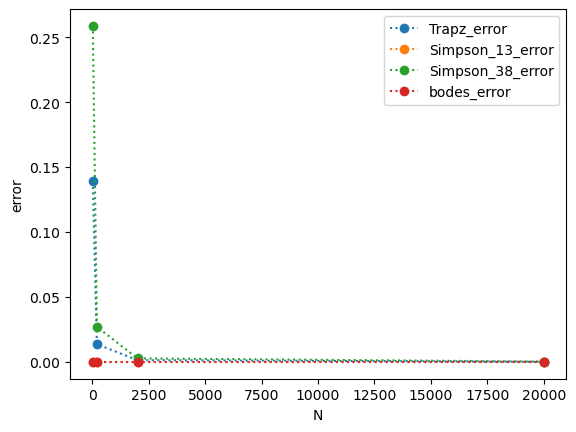

In [5]:
# Plot the differences between exact values and the estimated values (the error)

#calculating error
Trapz_error = abs(Trapz_list  - correct_value)
Simpson_13_error = abs(Simpson_13_list - correct_value)
Simpson_38_error = abs(Simpson_38_list - correct_value)
bodes_error = abs(bodes_list - correct_value)

#plotting
import matplotlib.pyplot as plt
plt.plot(N, Trapz_error,":o", label = 'Trapz_error')
plt.plot(N, Simpson_13_error,":o", label = 'Simpson_13_error')
plt.plot(N, Simpson_38_error,":o", label = 'Simpson_38_error')
plt.plot(N, bodes_error,":o", label = 'bodes_error')
plt.xlabel('N')
plt.ylabel('error')
plt.legend()
plt.show()

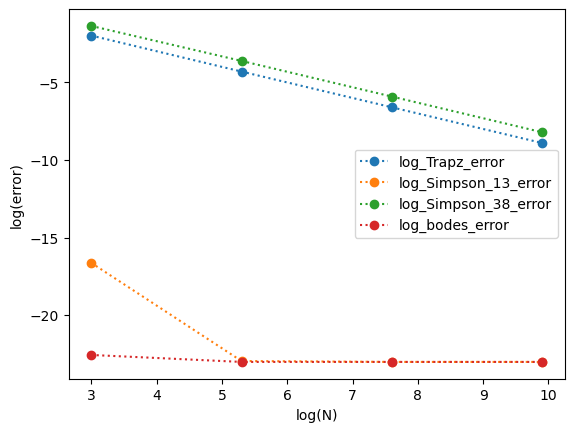

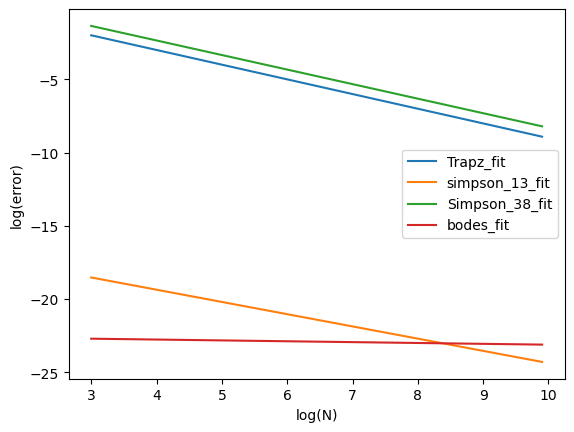


therefore the best method is bodes method


In [6]:

eps = 1e-10
log_N = np.array(np.log(N))
log_Trapz_error = np.array(np.log(Trapz_error + eps))
log_Simpson_13_error = np.array(np.log(Simpson_13_error + eps))
log_Simpson_38_error = np.array(np.log(Simpson_38_error + eps))
log_bodes_error = np.array(np.log(bodes_error + eps))

plt.plot(log_N,log_Trapz_error,':o',label='log_Trapz_error')
plt.plot(log_N,log_Simpson_13_error,':o',label='log_Simpson_13_error')
plt.plot(log_N,log_Simpson_38_error,':o',label='log_Simpson_38_error')
plt.plot(log_N,log_bodes_error,':o',label='log_bodes_error')
plt.xlabel('log(N)')
plt.ylabel('log(error)')
plt.legend()
plt.show()

#for curve fitting
from scipy.optimize import curve_fit

def eq_of_line(xs, p0, p1):
    return p0*xs+p1

Trapz_params,_ = curve_fit(eq_of_line,log_N, log_Trapz_error, p0=[1.0, 1.0])
Simpson_13_params,_  = curve_fit(eq_of_line,log_N, log_Simpson_13_error, p0=[1.0, 1.0])
Simpson_38_params,_  = curve_fit(eq_of_line,log_N, log_Simpson_38_error, p0=[1.0, 1.0])
bodes_params,_  = curve_fit(eq_of_line,log_N, log_bodes_error, p0=[1.0, 1.0])

plt.plot(log_N, eq_of_line(log_N, Trapz_params[0], Trapz_params[1]),label='Trapz_fit')
plt.plot(log_N, eq_of_line(log_N, Simpson_13_params[0], Simpson_13_params[1]),label='simpson_13_fit')
plt.plot(log_N, eq_of_line(log_N, Simpson_38_params[0], Simpson_38_params[1]),label='Simpson_38_fit')
plt.plot(log_N, eq_of_line(log_N, bodes_params[0], bodes_params[1]),label='bodes_fit')
plt.xlabel('log(N)')
plt.ylabel('log(error)')
plt.legend()
plt.show()


#efficinecy of the method, comparing the slope, the one with highest slope has the best accuracy!
### which method is best ???
method_name = ['Trapz method', 'Simpson_13 method', 'Simpson_38 method', 'bodes method']
method_slope = [Trapz_params[0],Simpson_13_params[0],Simpson_38_params[0],bodes_params[0]]
                
def best_method(method_name, method_slope):
    best_slope = max(method_slope)
    for i in range(len(method_slope)):
        if best_slope == method_slope[i]:
            return method_name[i]
    
print('\n'+'therefore the best method is',best_method(method_name, method_slope))

In [7]:
#Q3

# defining function with substitution as x = t^3
def g(t):
    return 3*(1-t**3)**(-1/3)

'''
x=0 singularity is removed but not x=1, this also has singularity at t=1. but mathematically this
form has less convergense rate than the earlier one.so somehow it handles the singularity.
'''

# given data
a = 0 #lower limit
b = 1 #upper limit
N = 2000 #no. of points

true_value = 2*np.pi/(np.sqrt(3))
print('correcct value is',true_value)
print('integration value by simson_38 rule',Simpson_38(a,b,N,g))

correcct value is 3.6275987284684357
integration value by simson_38 rule 3.596403858275618
